In [1]:
%cd ..

d:\~Perso\Etudes\DAC\NeuralNetworksDIY


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.activation import *
from src.loss import *
from utils.mltools import *
from sklearn.model_selection import train_test_split



accuracy :  0.967


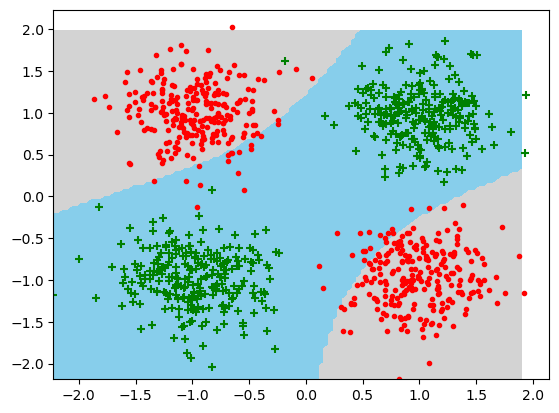

In [26]:
batchsize = 1000

X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=3000, data_type=1, epsilon=0.1)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=batchsize, data_type=1, epsilon=0.1)


y_train = np.where(y_train==-1,0,1).reshape((-1,1))
y_test = np.where(y_test==-1,0,1).reshape((-1,1))


n = X_train.shape[1]
hidden = 60
d = 1
iteration = 100
gradient_step = 1e-4

loss_mse = MSELoss()
lin_layer = Linear(n, hidden,)
lin_layer2 = Linear(hidden, d,)
act_sig = Sigmoide()
act_tan = TanH()

for _ in range(iteration):
    
    #forward
    hidden_lin = lin_layer.forward(X_train)    
    hidden_tan = act_tan.forward(hidden_lin)
    hidden_lin2 = lin_layer2.forward(hidden_tan)
    hidden_sig = act_sig.forward(hidden_lin2)
    loss = loss_mse.forward(y_train,hidden_sig)
    
    #backward
    
    loss_back = loss_mse.backward(y_train, hidden_sig)
    delta_sig = act_sig.backward_delta(hidden_lin2,loss_back)
    delta_lin2 = lin_layer2.backward_delta(hidden_tan,delta_sig)
    delta_tan = act_tan.backward_delta(hidden_lin,delta_lin2)
    delta_lin = lin_layer.backward_delta(X_train,delta_tan)
    


    lin_layer2.backward_update_gradient(hidden_tan, delta_sig)
    lin_layer.backward_update_gradient(X_train, delta_tan)    
    

    lin_layer2.update_parameters(gradient_step = gradient_step)
    lin_layer.update_parameters(gradient_step = gradient_step)
    
    lin_layer2.zero_grad()
    lin_layer.zero_grad()
    


def predict(x):
    hidden_l = lin_layer.forward(x)
    hidden_l = act_tan.forward(hidden_l)
    hidden_l = lin_layer2.forward(hidden_l)
    hidden_l = act_sig.forward(hidden_l)  
    return np.where(hidden_l >= 0.5,1, 0)

print("accuracy : ",np.mean(y_test == predict(X_test)))

plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
